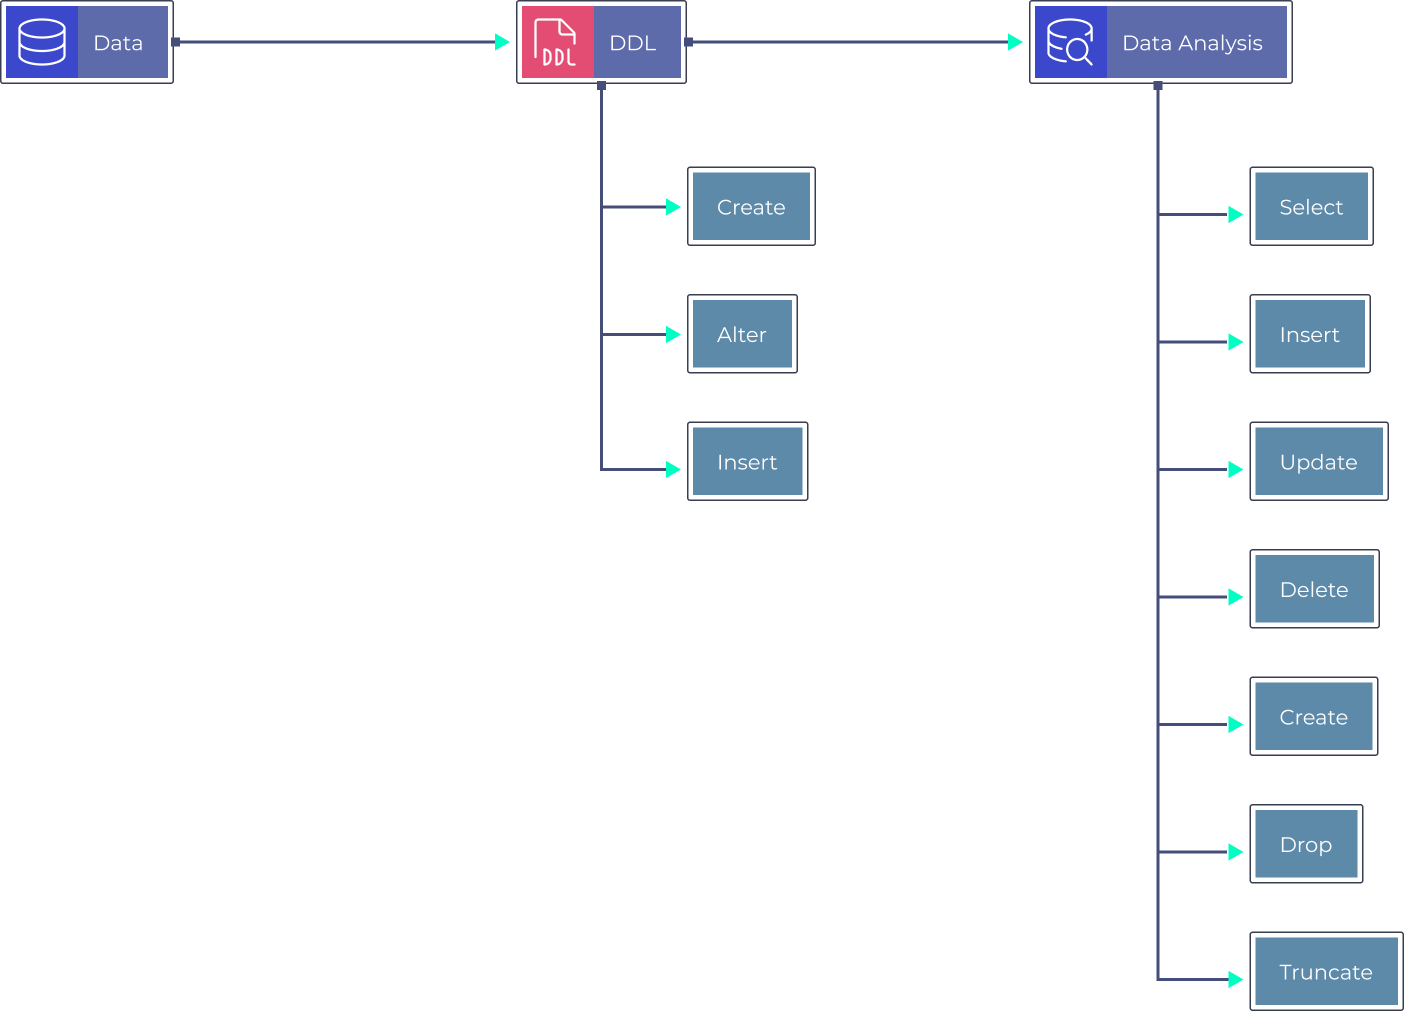

# In this SQL Project for Data Analysis, you will learn to efficiently analyse data using JOINS and various other operations accessible through SQL in Oracle Database.

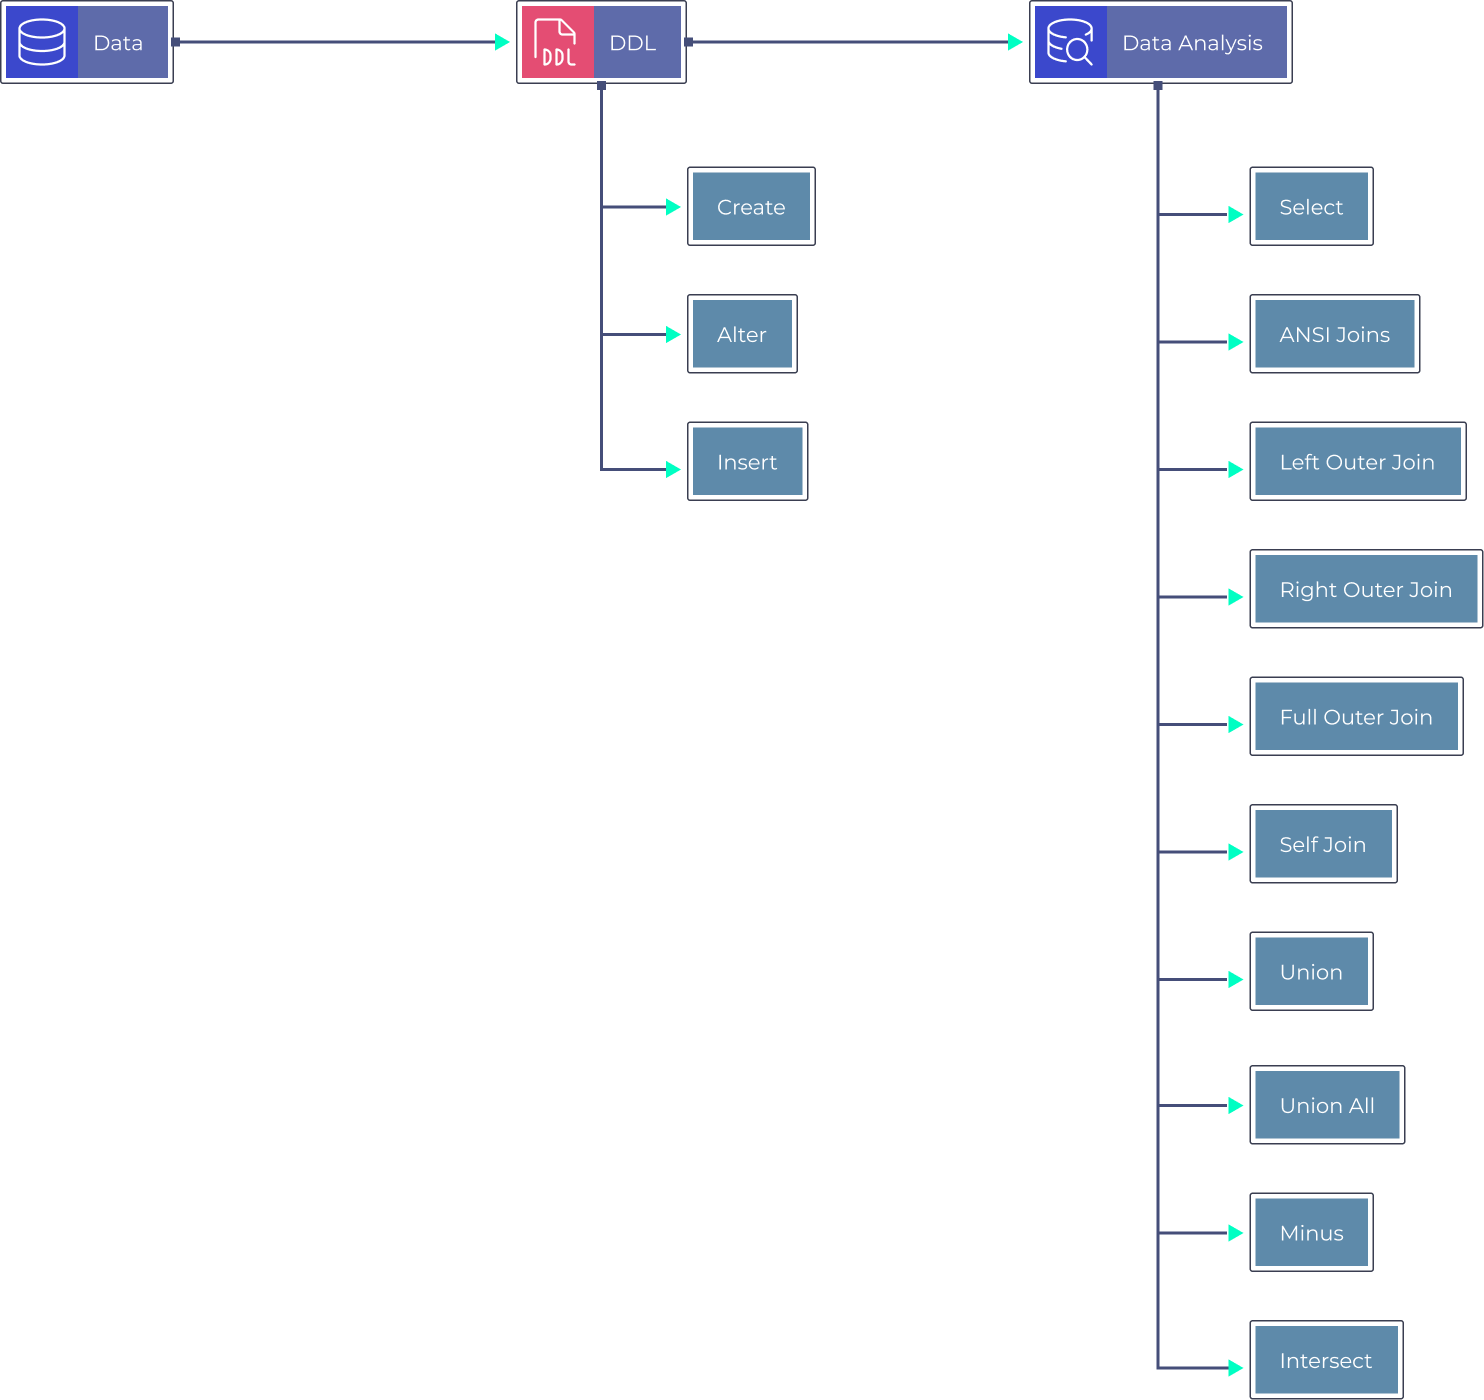

- Understanding the project and how to use Oracle SQL Developer
- Understanding the basics of data analysis, SQL commands, and their application
- Understanding the use of Oracle SQL Developer
- Understanding different types of joins.
- Understanding different types of operators.
- Understanding the difference between normal queries and ANSI queries.
- Joining multiple tables.
- Joining multiple tables using ANSI queries.
- Understanding the difference between UNION and UNION ALL operators.
- Understanding the reason behind column ambiguously defined error.
- Resolve the column ambiguously defined error.

In [ ]:
SELECT * FROM LOCATIONS;
SELECT * FROM DEPARTMENTS;
SELECT * FROM JOBS;
SELECT * FROM EMPLOYEES;
SELECT * FROM JOB_HISTORY;
SELECT * FROM REGIONS;
SELECT * FROM COUNTRIES;
SELECT * FROM NON_FUNCTIONAL_LOCATIONS;



/************************** Inner Join: display employee details. **************************/

SELECT *
FROM EMPLOYEES, DEPARTMENTS
WHERE EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
AND DEPARTMENTS.DEPARTMENT_NAME = 'Marketing';


SELECT EMPLOYEES.EMPLOYEE_ID,
EMPLOYEES.FIRST_NAME || ' ' || EMPLOYEES.LAST_NAME NAME,
EMPLOYEES.EMAIL,
LOCATIONS.CITY
FROM EMPLOYEES, DEPARTMENTS, LOCATIONS
WHERE EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
AND DEPARTMENTS.LOCATION_ID = LOCATIONS.LOCATION_ID
AND DEPARTMENTS.DEPARTMENT_NAME = 'Marketing';


--ANSI Join
SELECT EMPLOYEES.EMPLOYEE_ID,
EMPLOYEES.FIRST_NAME || ' ' || EMPLOYEES.LAST_NAME NAME,
EMPLOYEES.EMAIL,
LOCATIONS.CITY
FROM EMPLOYEES INNER JOIN DEPARTMENTS
ON EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
AND DEPARTMENTS.DEPARTMENT_NAME = 'Marketing'
INNER JOIN  LOCATIONS
ON DEPARTMENTS.LOCATION_ID = LOCATIONS.LOCATION_ID;

SELECT * FROM TABLE_1;
SELECT * FROM TABLE_2;

SELECT *
FROM TABLE_1, TABLE_2
WHERE COLUMN_1 = COLUMN_2;



In [ ]:

/************************** Resolve column ambiguously defined error. **************************/

/* column ambiguously defined */
SELECT *
FROM EMPLOYEES, DEPARTMENTS
WHERE DEPARTMENT_ID = DEPARTMENT_ID
AND DEPARTMENT_NAME = 'Marketing';


-- Alias
SELECT *
FROM EMPLOYEES e, DEPARTMENTS d
WHERE e.DEPARTMENT_ID = d.DEPARTMENT_ID
AND d.DEPARTMENT_NAME = 'Marketing';


SELECT e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
l.CITY
FROM EMPLOYEES e, DEPARTMENTS d, LOCATIONS l
WHERE e.DEPARTMENT_ID = d.DEPARTMENT_ID
AND d.LOCATION_ID = l.LOCATION_ID
AND d.DEPARTMENT_NAME = 'Marketing';



In [ ]:

/************************** LEFT OUTER JOIN: List down all the departments along with employees working under it. **************************/

--Incorrect Query
SELECT d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d, EMPLOYEES e
WHERE d.DEPARTMENT_ID = e.DEPARTMENT_ID
ORDER BY d.DEPARTMENT_ID;

--List down all the departments along with employees working under it.
-- when left outer join attact (+) to right table in condition
SELECT d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d, EMPLOYEES e
WHERE d.DEPARTMENT_ID = e.DEPARTMENT_ID(+)
ORDER BY d.DEPARTMENT_ID;

--ANSI JOIN
SELECT d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d LEFT OUTER JOIN EMPLOYEES e
ON d.DEPARTMENT_ID = e.DEPARTMENT_ID
ORDER BY d.DEPARTMENT_ID;


In [ ]:

/************************** RIGHT OUTER JOIN: List down all the employees along with department details. **************************/

--List down all the employees along with department details.
SELECT
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
d.DEPARTMENT_ID,
d.DEPARTMENT_NAME
FROM DEPARTMENTS d, EMPLOYEES e
WHERE d.DEPARTMENT_ID(+) = e.DEPARTMENT_ID
ORDER BY d.DEPARTMENT_ID;

--ANSI JOIN
SELECT
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
d.DEPARTMENT_ID,
d.DEPARTMENT_NAME
FROM DEPARTMENTS d RIGHT OUTER JOIN EMPLOYEES e
ON d.DEPARTMENT_ID = e.DEPARTMENT_ID
ORDER BY d.DEPARTMENT_ID;


--Fetch data only for those employees whose employee id is greater than 150
SELECT
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
d.DEPARTMENT_ID,
d.DEPARTMENT_NAME
FROM DEPARTMENTS d RIGHT OUTER JOIN EMPLOYEES e
ON d.DEPARTMENT_ID = e.DEPARTMENT_ID
WHERE e.EMPLOYEE_ID > 150
ORDER BY e.EMPLOYEE_ID;


--Fetch department details only for those employees whose employee id is greater than 150
SELECT
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
d.DEPARTMENT_ID,
d.DEPARTMENT_NAME
FROM DEPARTMENTS d RIGHT OUTER JOIN EMPLOYEES e
ON d.DEPARTMENT_ID = e.DEPARTMENT_ID
AND e.EMPLOYEE_ID > 150
ORDER BY e.EMPLOYEE_ID;


--Left Outer Join
SELECT *
FROM TABLE_1 LEFT JOIN TABLE_2
ON COLUMN_1 = COLUMN_2
ORDER BY 1;

--Right Outer Join
SELECT *
FROM TABLE_1 RIGHT JOIN TABLE_2
ON COLUMN_1 = COLUMN_2
ORDER BY 1;



In [ ]:

/************************** FULL OUTER JOIN and SELF JOIN **************************/

--FULL OUTER JOIN: Display all the employee and department records along with missing data.
--ANSI JOIN
SELECT d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d FULL OUTER JOIN EMPLOYEES e
ON d.DEPARTMENT_ID = e.DEPARTMENT_ID
ORDER BY d.DEPARTMENT_ID;


--Full Outer Join
SELECT *
FROM TABLE_1 FULL OUTER JOIN TABLE_2
ON COLUMN_1 = COLUMN_2
ORDER BY 1;

--SELF JOIN: display employee details along with manager details
SELECT
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
m.EMPLOYEE_ID as MGR_EMPLOYEE_ID,
m.FIRST_NAME || ' ' || m.LAST_NAME MGR_NAME
FROM EMPLOYEES e, EMPLOYEES m
WHERE e.MANAGER_ID = m.EMPLOYEE_ID(+)
ORDER BY e.EMPLOYEE_ID;

--ANSI JOIN
SELECT
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
m.EMPLOYEE_ID as MGR_EMPLOYEE_ID,
m.FIRST_NAME || ' ' || m.LAST_NAME MGR_NAME
FROM EMPLOYEES e LEFT JOIN EMPLOYEES m
ON e.MANAGER_ID = m.EMPLOYEE_ID
ORDER BY e.EMPLOYEE_ID;

--inner join
SELECT
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL,
m.EMPLOYEE_ID as MGR_EMPLOYEE_ID,
m.FIRST_NAME || ' ' || m.LAST_NAME MGR_NAME
FROM EMPLOYEES e LEFT JOIN EMPLOYEES m
ON e.MANAGER_ID = m.EMPLOYEE_ID
ORDER BY e.EMPLOYEE_ID;




In [ ]:
/************************** UNION and UNION ALL: Combine locations and non functional locations table. **************************/

/*
UNION ALL command is equal to UNION command, except that UNION ALL selects all the values.
The difference between Union and Union all is that Union all will not eliminate duplicate rows,
instead it just pulls all the rows from all the tables fitting your query specifics and combines them into a table.
*/


SELECT * FROM LOCATIONS;
SELECT * FROM NON_FUNCTIONAL_LOCATIONS;

-- CHECK VALUE FROM WHICH TABLE
SELECT 'FUNCTIONSL' LOC_TYPE, CITY  FROM LOCATIONS
UNION
SELECT 'NON_FUNCTIONSL' LOC_TYPE, CITY  FROM NON_FUNCTIONAL_LOCATIONS;

--TO_CHAR: CONVERT INT TO VAR-CHAR
SELECT CITY, POSTAL_CODE FROM LOCATIONS
UNION
SELECT CITY, TO_CHAR(POSTAL_CODE) FROM NON_FUNCTIONAL_LOCATIONS;


--UNION ALL GIVES DUPLICATE RECORDS ALSO..
SELECT CITY, POSTAL_CODE FROM LOCATIONS
UNION ALL
SELECT CITY, TO_CHAR(POSTAL_CODE) FROM NON_FUNCTIONAL_LOCATIONS;


--FULL OUTER JOIN: Display all the employee and department records along with missing data.
--ANSI JOIN
SELECT d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d FULL OUTER JOIN EMPLOYEES e
ON d.DEPARTMENT_ID = e.DEPARTMENT_ID
ORDER BY d.DEPARTMENT_ID;


--Achieve full outer join in traditional way.
SELECT d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d, EMPLOYEES e
WHERE d.DEPARTMENT_ID = e.DEPARTMENT_ID(+)
UNION
SELECT
d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d, EMPLOYEES e
WHERE d.DEPARTMENT_ID(+) = e.DEPARTMENT_ID;



SELECT d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d, EMPLOYEES e
WHERE d.DEPARTMENT_ID = e.DEPARTMENT_ID(+)
UNION ALL
SELECT
d.DEPARTMENT_ID,
d.DEPARTMENT_NAME,
e.EMPLOYEE_ID,
e.FIRST_NAME || ' ' || e.LAST_NAME NAME,
e.EMAIL
FROM DEPARTMENTS d, EMPLOYEES e
WHERE d.DEPARTMENT_ID(+) = e.DEPARTMENT_ID;





In [ ]:
/************************** MINUS and INTERSECT: Find unique and common locations **************************/

SELECT * FROM LOCATIONS;
SELECT * FROM NON_FUNCTIONAL_LOCATIONS;

--Find citys which are there in locations but not in non_functional_locations.
SELECT CITY FROM LOCATIONS
MINUS
SELECT CITY FROM NON_FUNCTIONAL_LOCATIONS;


--Find citys and postal_codes combination which are there in locations but not in non_functional_locations.
SELECT CITY, POSTAL_CODE FROM LOCATIONS
MINUS
SELECT CITY, TO_CHAR(POSTAL_CODE) FROM NON_FUNCTIONAL_LOCATIONS;


--Find citys which are present in both locations and non_functional_locations.
SELECT CITY FROM LOCATIONS
INTERSECT
SELECT CITY FROM NON_FUNCTIONAL_LOCATIONS;


--Find citys and postal_codes combination which are present in both locations and non_functional_locations.
SELECT CITY, POSTAL_CODE FROM LOCATIONS
INTERSECT
SELECT CITY, TO_CHAR(POSTAL_CODE) FROM NON_FUNCTIONAL_LOCATIONS;



In [ ]:

/************************** Join multiple tables to fetch employee details **************************/
-- TRADITIONAL WAY
SELECT E.FIRST_NAME || ' ' ||E.LAST_NAME AS EMPLOYEE_NAME,
E.EMAIL,
D.DEPARTMENT_NAME,
L.CITY AS DEPARTMENT_LOCATION,
J.JOB_TITLE,
M.FIRST_NAME || ' ' || M.LAST_NAME MANAGER_NAME,
C.COUNTRY_NAME
FROM EMPLOYEES E,
DEPARTMENTS D,
JOBS J,
EMPLOYEES M,
LOCATIONS L,
COUNTRIES C
WHERE E.DEPARTMENT_ID = D.DEPARTMENT_ID(+)
AND E.JOB_ID = J.JOB_ID(+)
AND E.MANAGER_ID = M.EMPLOYEE_ID(+)
AND D.LOCATION_ID = L.LOCATION_ID(+)
AND L.COUNTRY_ID = C.COUNTRY_ID(+);


In [ ]:
/************************** Convert previous query to ANSI join query: ADVANCE WAY **************************/
-- INNER JOIN
SELECT E.FIRST_NAME || ' ' ||E.LAST_NAME AS EMPLOYEE_NAME,
E.EMAIL,
D.DEPARTMENT_NAME,
L.CITY AS DEPARTMENT_LOCATION,
J.JOB_TITLE,
M.FIRST_NAME || ' ' || M.LAST_NAME MANAGER_NAME,
C.COUNTRY_NAME
FROM EMPLOYEES E JOIN DEPARTMENTS D
ON E.DEPARTMENT_ID = D.DEPARTMENT_ID
JOIN JOBS J
ON E.JOB_ID = J.JOB_ID
JOIN EMPLOYEES M
ON E.MANAGER_ID = M.EMPLOYEE_ID
JOIN LOCATIONS L
ON D.LOCATION_ID = L.LOCATION_ID
JOIN COUNTRIES C
ON L.COUNTRY_ID = C.COUNTRY_ID;


--LEFT JOIN
SELECT E.FIRST_NAME || ' ' ||E.LAST_NAME AS EMPLOYEE_NAME,
E.EMAIL,
D.DEPARTMENT_NAME,
L.CITY AS DEPARTMENT_LOCATION,
J.JOB_TITLE,
M.FIRST_NAME || ' ' || M.LAST_NAME MANAGER_NAME,
C.COUNTRY_NAME
FROM EMPLOYEES E LEFT JOIN DEPARTMENTS D
ON E.DEPARTMENT_ID = D.DEPARTMENT_ID
LEFT JOIN JOBS J
ON E.JOB_ID = J.JOB_ID
LEFT JOIN EMPLOYEES M
ON E.MANAGER_ID = M.EMPLOYEE_ID
LEFT JOIN LOCATIONS L
ON D.LOCATION_ID = L.LOCATION_ID
LEFT JOIN COUNTRIES C
ON L.COUNTRY_ID = C.COUNTRY_ID;